Introduction:
The objective of this project is to extract 311 data from a specified URL and organize it into manageable chunks by year and month. This data extraction process is necessary to ensure that each subset of the data is under 100MB, allowing us to host an append-only data warehouse on GitHub. 

Action Items:
1. Obtain cleaning rules from the 311-data repository and provide a link to these rules in the "Resources" section below.
2. Retrieve city data from the specified URL.
3. Split the data by year and further partition it by month.
4. Document the data cleaning procedures within the Jupyter notebook.
5. Create a Jupyter notebook to access and manipulate the data, including detailed notes on the applied cleaning rules.
6. Develop a website, preferably using GitHub Pages (ghpages), to showcase the Jupyter notebook. This website will enable users to view and interact with the data without the need to download or install any additional software.

By following these action items, we aim to streamline the process of accessing, cleaning, and presenting the 311 data, ultimately facilitating its use for analysis and exploration.

Steps to achive intial objectives
1. **Data Acquisition**: Obtain 311 data from the specified URL.
2. **Data Cleaning**: Implement cleaning rules to standardize the data
3. **Data Exploration**: Create a Jupyter notebook to explore and document the data cleaning process.
4. **Data Splitting**: Divide the dataset into smaller subsets by year and month.


In [1]:
# Importing the necessary library 
import requests
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point
from matplotlib.colors import LogNorm

import warnings  
# Ignore warnings
warnings.filterwarnings('ignore')

# Data Access from URL

In [2]:
# URL of the CSV file to download
url="https://data.lacity.org/api/views/b7dx-7gc3/rows.csv?accessType=DOWNLOAD"

#print(url)

# Sending a GET request to the specified URL and storing the response
response=requests.get(url)

In [3]:
#Output file path
output_file = "./Data_csvfile/2024.csv"


In [4]:
# Check if request was successful
if response.status_code == 200:
    # Open the output file in write-binary mode
    with open(output_file, 'wb') as file:
        # Write the fetched data to the file
        file.write(response.content)
    print(f"Data saved successfully to {output_file}")
else:
    print(f"Failed to fetch data from {url}. Status code: {response.status_code}")

Data saved successfully to ./Data_csvfile/2024.csv


In [5]:
# Read the output CSV file into a DataFrame

df=pd.read_csv(output_file)

# Inspect Data

In [6]:
data=df.copy(deep=True)

In [7]:
# Display the first few rows of the dataset for initial examination

data.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-4601720641,01/01/2024 12:00:06 AM,01/03/2024 10:37:51 AM,SR Created,LASAN,Bulky Items,Closed,Call,LASAN,NaN,...,POINT (-118.342143549 34.0211832597),673.0,D,1.0,South Los Angeles APC,10.0,Heather Hutt,75.0,West Adams,SOUTHWEST
1,1-4601721601,01/01/2024 12:05:06 AM,01/01/2024 12:05:06 AM,SR Created,BSL,Multiple Streetlight Issue,Open,Self Service,Self Service,NaN,...,POINT (-118.3036039481 33.789784475205),793.0,J,5.0,Harbor APC,15.0,Tim McOsker,92.0,Harbor City,HARBOR
2,1-4601723091,01/01/2024 12:06:54 AM,01/01/2024 12:06:56 AM,SR Created,BSL,Single Streetlight Issue,Open,Mobile App,Self Service,iOS,...,POINT (-118.36056718 34.0858735),593.0,B,6.0,Central APC,5.0,Katy Yaroslavsky,58.0,Mid-City West,WILSHIRE
3,1-4601721751,01/01/2024 12:11:45 AM,01/02/2024 07:01:31 PM,SR Created,LASAN,Bulky Items,Closed,Mobile App,Self Service,Android,...,POINT (-118.533785604 34.2067120073),530.0,J,4.0,South Valley APC,4.0,Nithya Raman,15.0,Reseda,WEST VALLEY
4,1-4601723281,01/01/2024 12:18:03 AM,01/29/2024 09:06:38 AM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,iOS,...,POINT (-118.28067055 34.0423584867),634.0,B,5.0,Central APC,1.0,Eunisses Hernandez,76.0,Pico Union,RAMPART


In [8]:
# Provide information about the dataset's structure, including data types and memory usage

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901503 entries, 0 to 901502
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SRNumber                   901503 non-null  object 
 1   CreatedDate                901503 non-null  object 
 2   UpdatedDate                901503 non-null  object 
 3   ActionTaken                901503 non-null  object 
 4   Owner                      901503 non-null  object 
 5   RequestType                901503 non-null  object 
 6   Status                     901503 non-null  object 
 7   RequestSource              901503 non-null  object 
 8   CreatedByUserOrganization  901503 non-null  object 
 9   MobileOS                   311437 non-null  object 
 10  Anonymous                  901503 non-null  object 
 11  AssignTo                   892837 non-null  object 
 12  ServiceDate                830698 non-null  object 
 13  ClosedDate                 83

In [9]:
# Compute and display summary statistics of numerical columns to understand the data distribution
data.describe()

,HouseNumber,Latitude,Longitude,TBMPage,TBMRow,CD,NC
count,771610.000000,900434.000000,900434.000000,900427.000000,900427.000000,900431.000000,888250.000000
mean,6354.359004,34.089489,-118.362547,607.707364,4.084634,8.305534,57.209854
std,5842.249786,0.119788,0.110158,84.865823,1.928138,4.368453,34.748668
min,1.000000,33.706052,-118.667841,480.000000,1.000000,1.000000,4.000000
25%,1441.000000,34.024662,-118.441957,532.000000,2.000000,5.000000,24.000000
50%,4574.000000,34.077451,-118.334628,595.000000,4.000000,8.000000,54.000000
75%,10100.000000,34.188462,-118.278891,671.000000,6.000000,12.000000,86.000000
max,29199.000000,34.334335,-118.155792,4724.000000,7.000000,15.000000,128.000000


In [10]:
# Identify missing values in the dataset and report the count of missing values for each column
data.isnull().sum()

SRNumber                          0
CreatedDate                       0
UpdatedDate                       0
ActionTaken                       0
Owner                             0
RequestType                       0
Status                            0
RequestSource                     0
CreatedByUserOrganization         0
MobileOS                     590066
Anonymous                         0
AssignTo                       8666
ServiceDate                   70805
ClosedDate                    70678
AddressVerified                   0
ApproximateAddress           366217
Address                         270
HouseNumber                  129893
Direction                     59888
StreetName                   129892
Suffix                        71369
ZipCode                        1199
Latitude                       1069
Longitude                      1069
Location                       1069
TBMPage                        1076
TBMColumn                      1076
TBMRow                      

In [11]:
# Dimensions of the Dataset
data.shape

(901503, 34)

In [12]:
# Column Names in the Dataset
data.columns

Index(['SRNumber', 'CreatedDate', 'UpdatedDate', 'ActionTaken', 'Owner',
       'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
       'MobileOS', 'Anonymous', 'AssignTo', 'ServiceDate', 'ClosedDate',
       'AddressVerified', 'ApproximateAddress', 'Address', 'HouseNumber',
       'Direction', 'StreetName', 'Suffix', 'ZipCode', 'Latitude', 'Longitude',
       'Location', 'TBMPage', 'TBMColumn', 'TBMRow', 'APC', 'CD', 'CDMember',
       'NC', 'NCName', 'PolicePrecinct'],
      dtype='object')

RequestType
Bulky Items                   429298
Graffiti Removal              200149
Metal/Household Appliances     77049
Illegal Dumping Pickup         67886
Homeless Encampment            54559
Electronic Waste               24863
Dead Animal Removal            20651
Multiple Streetlight Issue     10115
Single Streetlight Issue        9031
Other                           6181
Report Water Waste               961
Feedback                         760
Name: count, dtype: int64


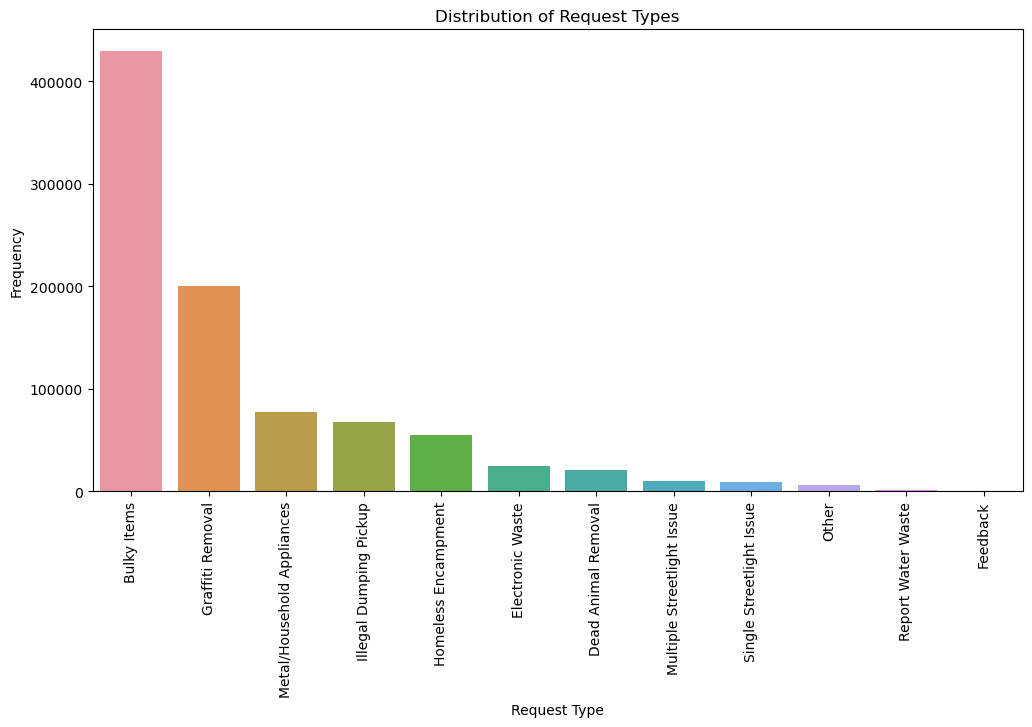

In [13]:
# Count the frequency of each category in 'RequestType'
request_type_counts = data['RequestType'].value_counts()
print(request_type_counts)
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust size if needed
sns.barplot(x=request_type_counts.index, y=request_type_counts.values)
plt.title('Distribution of Request Types')
plt.xlabel('Request Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


Line Charts of Service Requests Over Time by Type

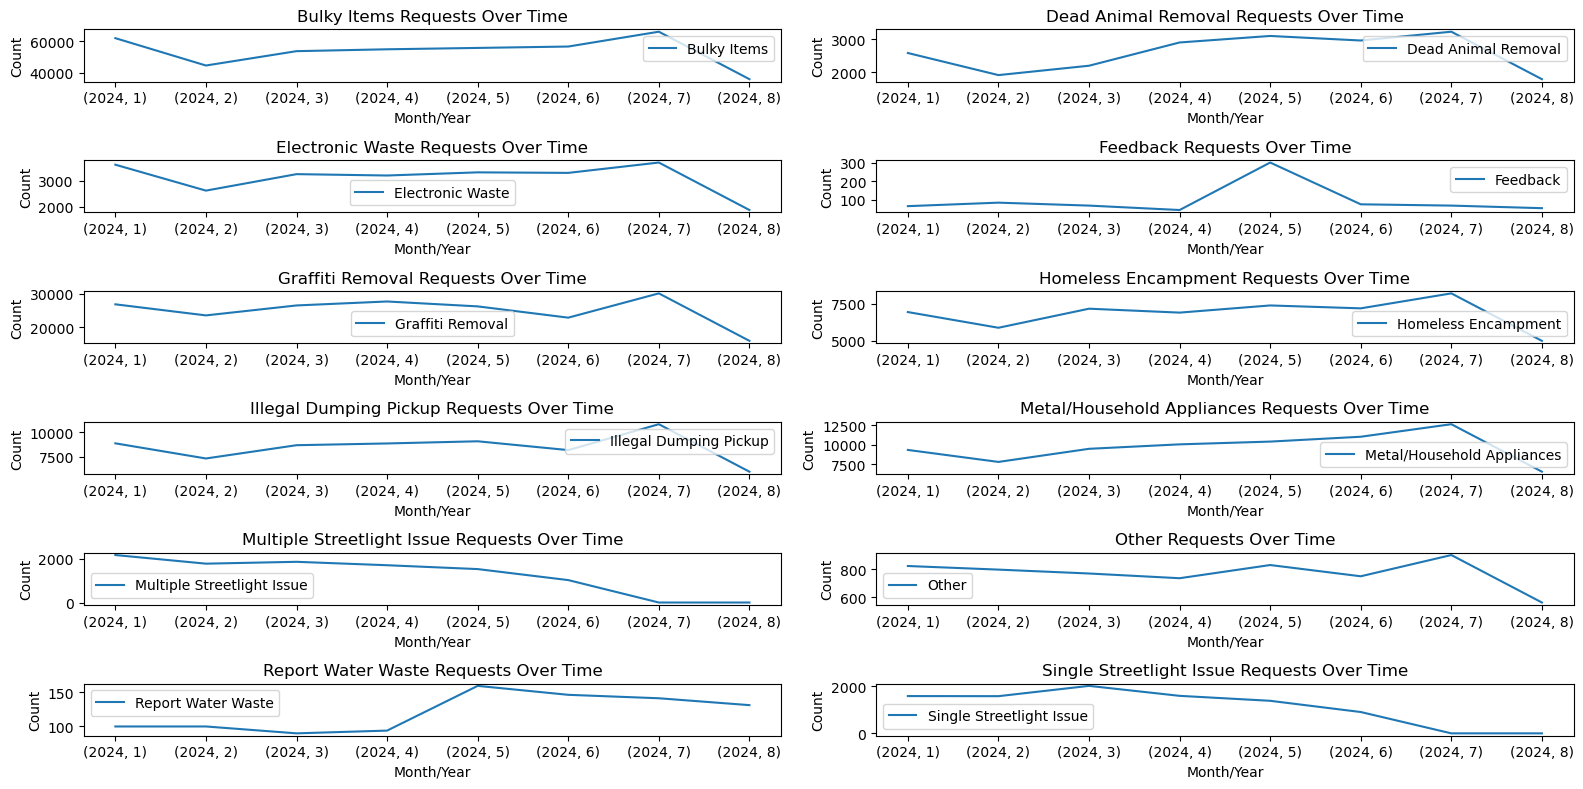

In [14]:
# Assuming 'CreatedDate' column is in datetime format
data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])

# Extract month and year
data['Month'] = data['CreatedDate'].dt.month
data['Year'] = data['CreatedDate'].dt.year

# Group by service request type, month, and year
grouped_data = data.groupby(['RequestType', 'Year', 'Month']).size().unstack(level=0, fill_value=0)

# Get unique service request types
request_types = grouped_data.columns

# Determine number of rows and columns for subplots
num_rows = (len(request_types) + 1) // 2  # Add 1 to round up
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 8))

# Plot line charts for each service request type
for i, request_type in enumerate(request_types):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    grouped_data[request_type].plot(ax=ax, kind='line', legend=True)
    ax.set_title(f'{request_type} Requests Over Time')
    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

Service Requests Over Time by Request Type



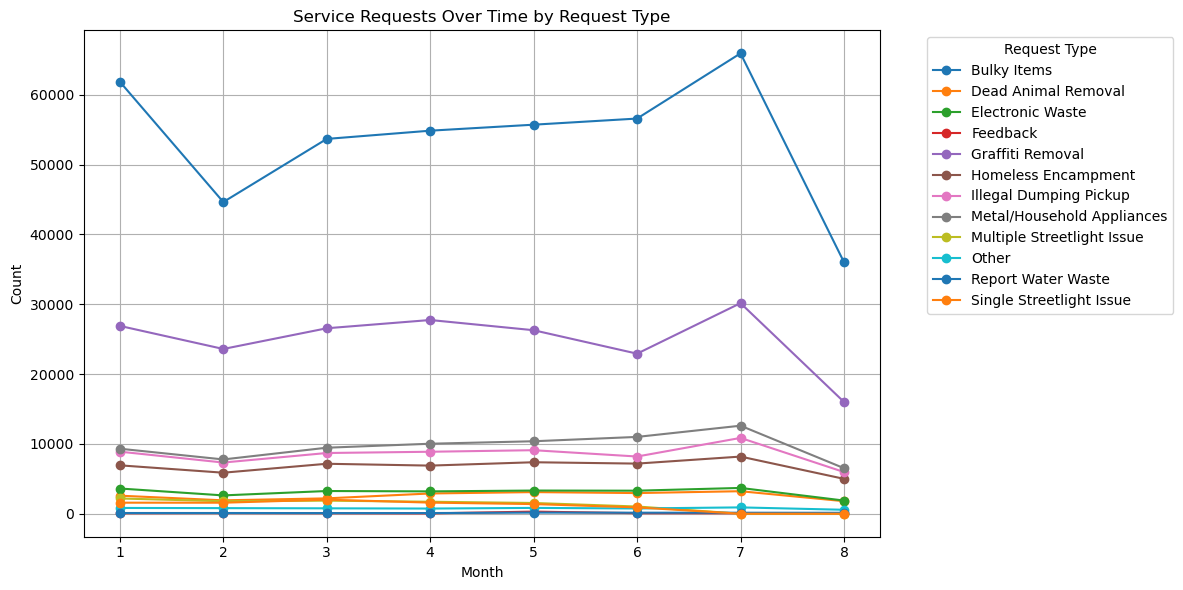

In [15]:
# Group by month and count service requests
monthly_counts = data.groupby('Month')['RequestType'].value_counts().unstack(fill_value=0)

# Plot line charts for each month
monthly_counts.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Service Requests Over Time by Request Type')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Request Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Total Service Requests Over Time


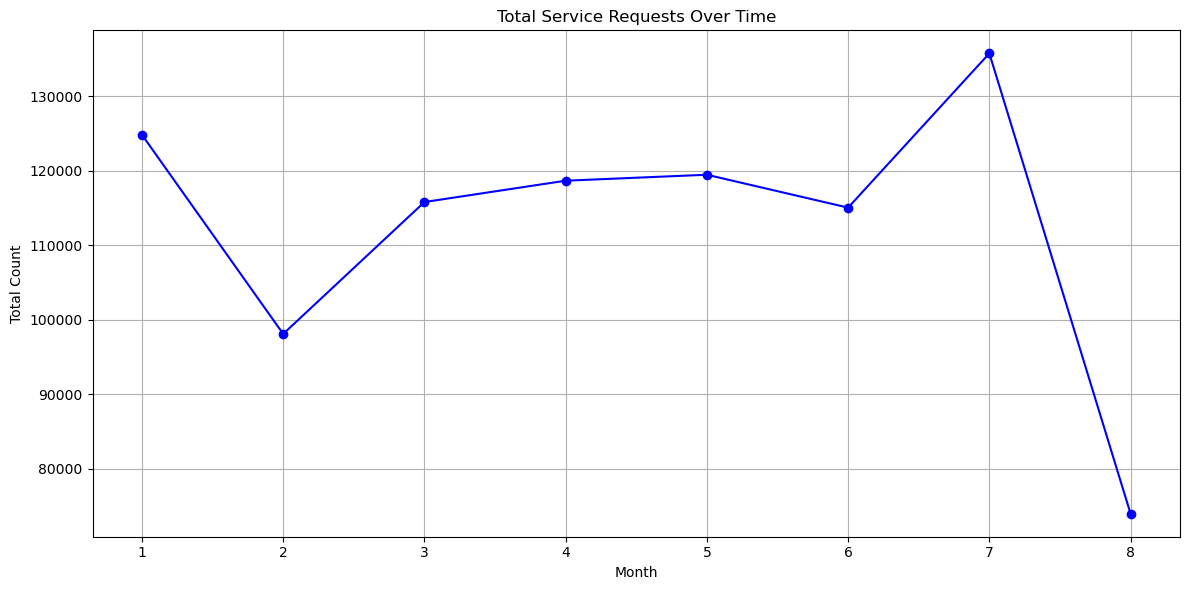

In [16]:
# Group by month and count total service requests
monthly_total_counts = data.groupby('Month').size()

# Plot line chart for total service requests over time
monthly_total_counts.plot(kind='line', figsize=(12, 6), marker='o', color='blue')
plt.title('Total Service Requests Over Time')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.grid(True)
plt.tight_layout()
plt.show()


RequestSource
Call                             354423
Mobile App                       311413
Self Service                     145375
Driver Self Report                86038
Council's Office                   2229
Email                              1707
Voicemail                           246
Social                               54
Walk-in                               7
Fax                                   4
Web Form                              3
Queue Initiated Customer Call         1
Letter                                1
City Attorney                         1
Radio                                 1
Name: count, dtype: int64


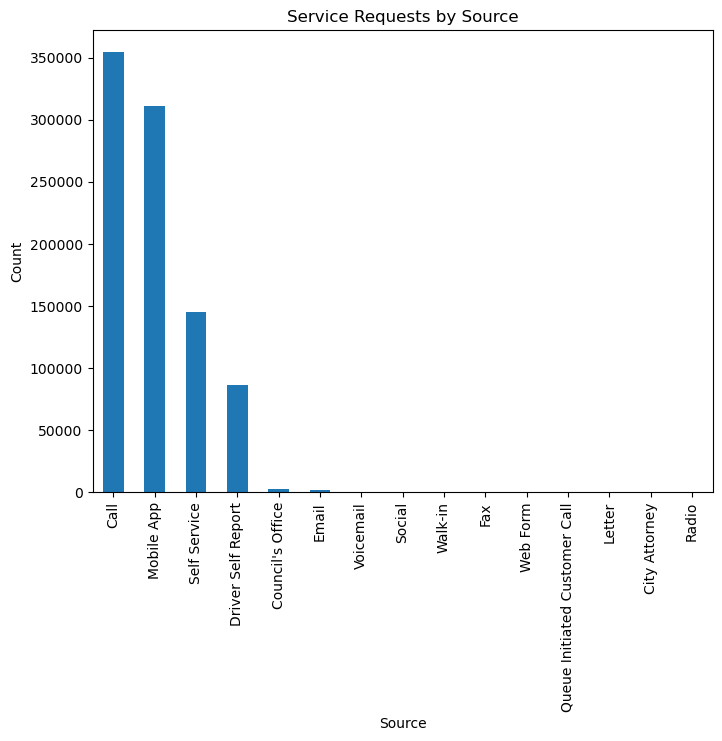

In [17]:
# Bar chart: Service requests by source
source_counts = data['RequestSource'].value_counts()
print(source_counts)
source_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Service Requests by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()



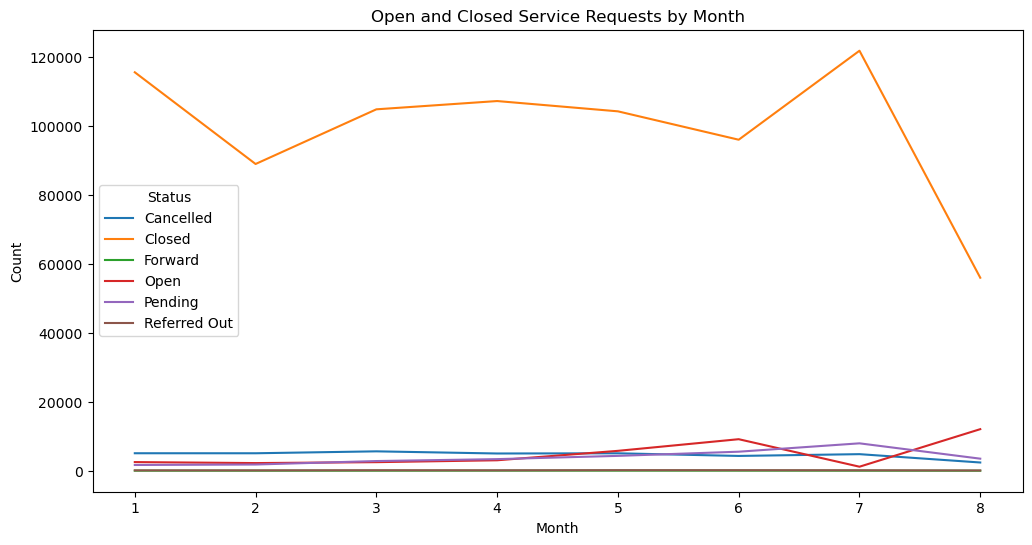

Total Counts for Each Status:
              Total Count
Status                   
Cancelled           37282
Closed             793751
Forward               178
Open                38359
Pending             30901
Referred Out         1032


In [18]:
# Group by month and status
monthly_counts = data.groupby(['Month', 'Status']).size().unstack(fill_value=0)

# Plot the counts for open and closed service requests for each month
ax = monthly_counts.plot(kind='line', figsize=(12, 6))
plt.title('Open and Closed Service Requests by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

# Display total counts in a table
total_counts = monthly_counts.sum()
total_counts_table = pd.DataFrame(total_counts, columns=['Total Count'])
print("Total Counts for Each Status:")
print(total_counts_table)


In [19]:
ncname_counts = data['NCName'].value_counts()
print(ncname_counts)

NCName
Boyle Heights                     30312
Wilshire Center-Koreatown         20979
Empowerment Congress Southeast    20570
Downtown Los Angeles              20409
Van Nuys                          20192
                                  ...  
Westwood                           3317
Elysian Valley Riverside           1797
North Westwood                     1473
Arts District Little Tokyo         1299
Hermon                              907
Name: count, Length: 99, dtype: int64


In [20]:
# Count total occurrences of 'NCName'
ncname_total_count = data['NCName'].count()

# Display the total count
print("Total count of NCName:", ncname_total_count)


Total count of NCName: 888250


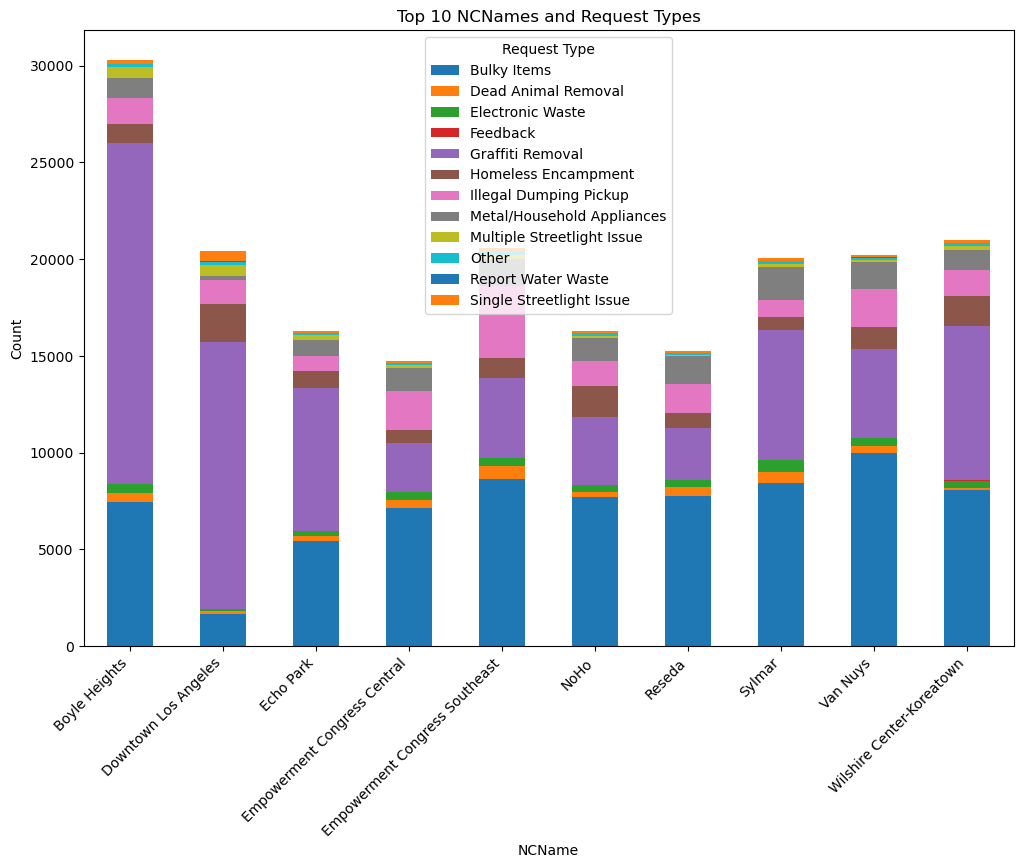

In [21]:
# Get the top 10 NCNames
top_ncnames = data['NCName'].value_counts().head(10).index

# Filter the data for the top 10 NCNames
filtered_data = data[data['NCName'].isin(top_ncnames)]

# Group by NCName and RequestType and count occurrences
ncname_request_counts = filtered_data.groupby(['NCName', 'RequestType']).size().unstack(fill_value=0)

# Plot the bar chart
ncname_request_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 10 NCNames and Request Types')
plt.xlabel('NCName')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Request Type')
plt.show()


CDMember
Heather Hutt               66463
Hugo Soto-Martinez         65545
Marqueece Harris-Dawson    64171
Imelda Padilla             58392
Paul Krekorian             57779
John Lee                   56648
Kevin de León              54929
Nithya Raman               53420
Eunisses Hernandez         53226
Monica Rodriguez           49625
Bob Blumenfield            49407
Tim McOsker                49036
Traci Park                 49027
Curren D. Price Jr.        48521
Katy Yaroslavsky           45263
Nury Martinez                  1
Vacant                         1
Mike Bonin                     1
Name: count, dtype: int64


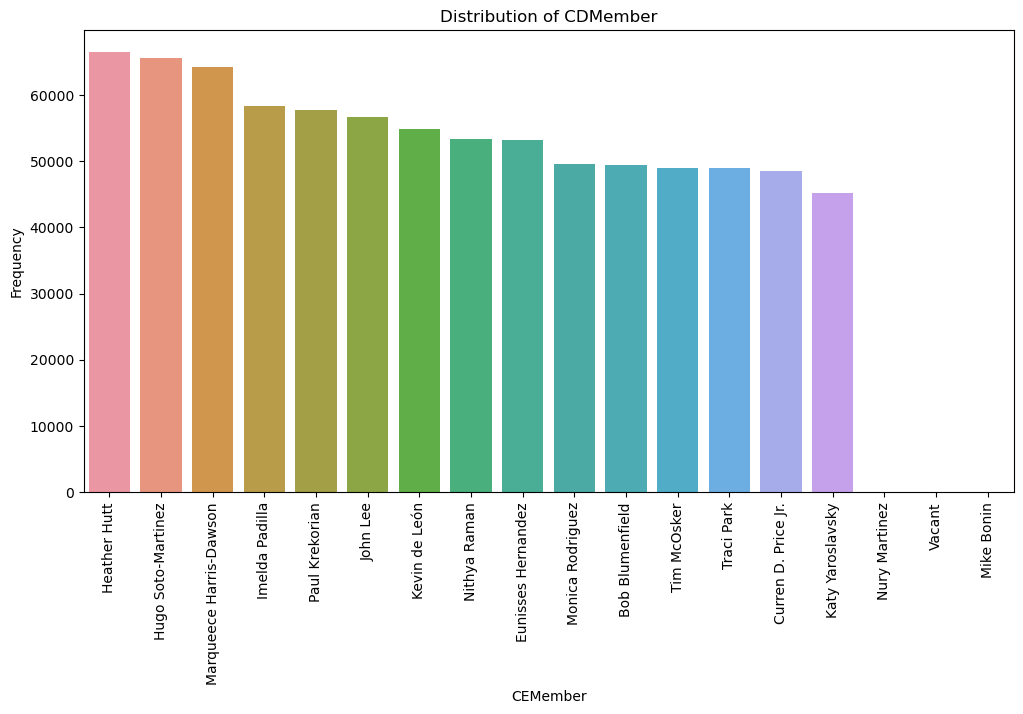

In [22]:
cdmember_count=data['CDMember'].value_counts()
print(cdmember_count)
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust size if needed
sns.barplot(x=cdmember_count.index, y=cdmember_count.values)
plt.title('Distribution of CDMember')
plt.xlabel('CEMember')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

<Axes: >

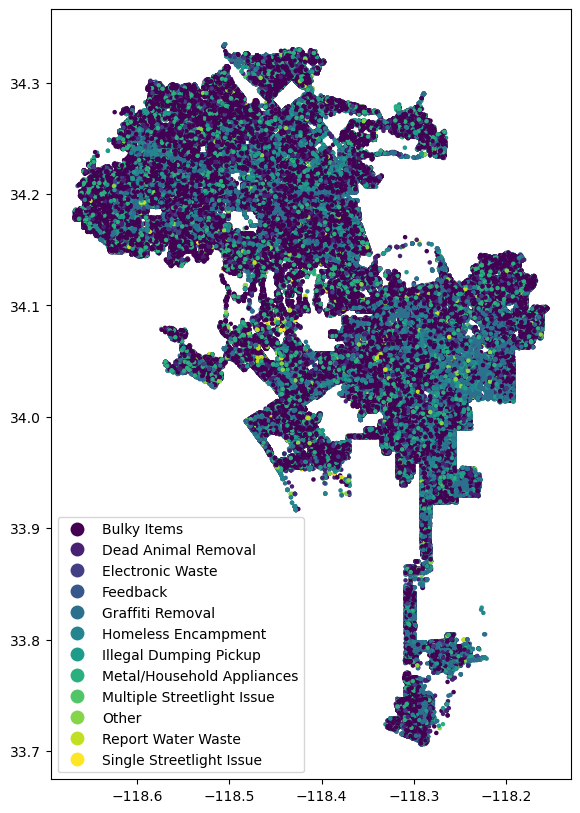

In [23]:
# Create a GeoDataFrame from the service request data
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')

# Plot the data with a larger size
geo_data.plot(column='RequestType', cmap='viridis', legend=True, markersize=5, figsize=(20, 10))

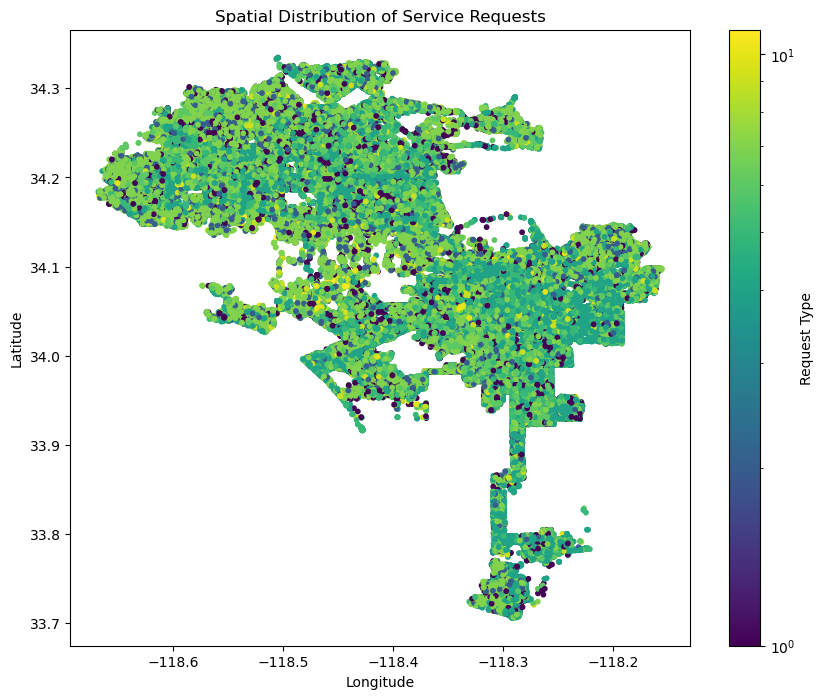

In [24]:
# Convert the 'RequestType' column to a categorical data type
geo_data['RequestType'] = geo_data['RequestType'].astype('category')

# Create a scatter plot to visualize the spatial distribution of service requests
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(x=geo_data['Longitude'], y=geo_data['Latitude'], c=geo_data['RequestType'].cat.codes, cmap='viridis', norm=LogNorm(), s=10)
plt.colorbar(sc, label='Request Type')
plt.title('Spatial Distribution of Service Requests')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Data Cleaning

In [25]:
data=df.copy()

In [26]:
# Remove duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [27]:
# Checking for missing values
null_counts = data.isnull().sum()
print("Columns with missing values:\n", null_counts[null_counts > 0])

Columns with missing values:
 MobileOS              590066
AssignTo                8666
ServiceDate            70805
ClosedDate             70678
ApproximateAddress    366217
Address                  270
HouseNumber           129893
Direction              59888
StreetName            129892
Suffix                 71369
ZipCode                 1199
Latitude                1069
Longitude               1069
Location                1069
TBMPage                 1076
TBMColumn               1076
TBMRow                  1076
APC                     1130
CD                      1072
CDMember               80048
NC                     13253
NCName                 13253
PolicePrecinct          1094
dtype: int64


In [28]:
# Convert date columns to datetime
date_cols = ['CreatedDate', 'UpdatedDate', 'ServiceDate', 'ClosedDate']
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')
    

data.info()     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901503 entries, 0 to 901502
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   SRNumber                   901503 non-null  object        
 1   CreatedDate                901503 non-null  datetime64[ns]
 2   UpdatedDate                901503 non-null  datetime64[ns]
 3   ActionTaken                901503 non-null  object        
 4   Owner                      901503 non-null  object        
 5   RequestType                901503 non-null  object        
 6   Status                     901503 non-null  object        
 7   RequestSource              901503 non-null  object        
 8   CreatedByUserOrganization  901503 non-null  object        
 9   MobileOS                   311437 non-null  object        
 10  Anonymous                  901503 non-null  object        
 11  AssignTo                   892837 non-null  object  

In [29]:
#CD and CDMember, suggests they might represent the same data, and emphasizes the need for analysis-driven decision making on dropping one column.
# # Group data by each categorical variable and count occurrences
cd_value_counts = data[['CD', 'CDMember']].value_counts().reset_index(name='Count')

# Sort by CD and CDMember in ascending order
cd_value_counts = cd_value_counts.sort_values(by=['CD', 'CDMember'], ascending=True)

# Print the table
print(cd_value_counts.to_string(index=True))

      CD                 CDMember  Count
8    1.0       Eunisses Hernandez  53226
4    2.0           Paul Krekorian  57779
10   3.0          Bob Blumenfield  49406
7    4.0             Nithya Raman  53420
14   5.0         Katy Yaroslavsky  45263
3    6.0           Imelda Padilla  58392
16   6.0                   Vacant      1
9    7.0         Monica Rodriguez  49625
2    8.0  Marqueece Harris-Dawson  64169
13   9.0      Curren D. Price Jr.  48521
0   10.0             Heather Hutt  66463
15  11.0               Mike Bonin      1
12  11.0               Traci Park  49027
5   12.0                 John Lee  56648
1   13.0       Hugo Soto-Martinez  65545
6   14.0            Kevin de León  54929
11  15.0              Tim McOsker  49036


In [30]:
#NC and NCName, suggests they might represent the same data, and emphasizes the need for analysis-driven decision making on dropping one column.
# # # Group data by NC, NCName, and count occurrences
nc_value_counts = data[['NC', 'NCName']].value_counts().reset_index(name='Count')

# Sort by NC and NCName in ascending order
nc_value_counts = nc_value_counts.sort_values(by=['NC', 'NCName'], ascending=True)

# Print the table
print(nc_value_counts.to_string(index=True))

       NC                          NCName  Count
73    4.0             Granada Hills North   5407
5     5.0                          Sylmar  20055
53    6.0                          Arleta   7657
17    7.0                         Pacoima  12477
25    8.0                 Sun Valley Area  10907
87    9.0       Foothills Trails District   4577
27   10.0                 Sunland-Tujunga  10703
41   11.0                      West Hills   9238
45   13.0                     Canoga Park   8825
33   14.0                        Winnetka  10017
8    15.0                          Reseda  15258
11   16.0    Woodland Hills-Warner Center  14456
47   17.0                         Tarzana   8455
44   18.0                          Encino   8941
20   19.0                     Lake Balboa  11838
4    20.0                        Van Nuys  20192
23   21.0             Greater Valley Glen  11029
82   22.0            North Hollywood West   4797
19   23.0       North Hollywood Northeast  12146
7    24.0           

In [31]:
# Remove Unnecessary Columns - Remove columns not useful for analysis 
#SRNumber: Unique identifier, likely not directly relevant to analysis.
# MobileOS: Not essential unless analyzing trends related to mobile operating systems.A
# nonymous: May not be a key factor depending on the analysis focus. 
# HouseNumber, Direction, StreetName, Suffix: These details are already captured within the address column and are therefore redundant for analysis purposes.
# TBMPage, TBMColumn, TBMRow: Redundant if you have a more comprehensive address or location data point.
#CDMember: Missing values can be filled based on CD column, However ease of analysis droping this column 
# for information about dataset:  https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2024/b7dx-7gc3/about_data

unnecessary_columns = ['SRNumber', 'MobileOS', 'Anonymous','HouseNumber','Direction','StreetName','Suffix','ApproximateAddress','TBMPage', 'TBMColumn', 'TBMRow','CDMember']
data.drop(columns=unnecessary_columns, inplace=True)

In [32]:
data.shape

(901503, 22)

In [33]:
# Categorical Data Cleaning
#Lowercasing below categorical variables ensures data consistency, reduces errors in analysis, and simplifies comparisons/grouping.

cat_columns = ['ActionTaken', 'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization']
data[cat_columns] = data[cat_columns].apply(lambda x: x.str.lower())

In [34]:
# Checking for missing values
null_counts = data.isnull().sum()
print("Columns with missing values:\n", null_counts[null_counts > 0])

Columns with missing values:
 AssignTo           8666
ServiceDate       70805
ClosedDate        70678
Address             270
ZipCode            1199
Latitude           1069
Longitude          1069
Location           1069
APC                1130
CD                 1072
NC                13253
NCName            13253
PolicePrecinct     1094
dtype: int64


In [35]:
#Handling missing values based on column-specific strategies :  For example, impute categorical columns with mode and numeric columns with mean or median

# Drop rows with missing values in any of the specified columns
data = data.dropna(subset=['Longitude', 'Latitude', 'Location'],thresh=2)

#ServiceDate and ClosedDate values are missing : based on statusand updated state filling thes values 

In [36]:
	
# Open - Being reviewed and worked on. 
# Pending - Has been reviewed and requires additional work 
# Forward - Has been reviewed and forwarded to another department for fulfillment.
# Closed - The request has been completed. 
# Canceled - The request could not be completed. 
# Referred Out - The request was referred out to an outside agency and the request can no longer be tracked in MyLA311

In [37]:
print( data['ServiceDate'].isna().sum())
print(data['ClosedDate'].isna().sum())

70481
69900


In [38]:
# Define a function to update dates based on status
def update_dates(row):
    if row['Status'] not in ['open', 'pending']:  # Update only for non-Open/Pending rows
        if pd.isna(row['ServiceDate']):
            row['ServiceDate'] = row['UpdatedDate']
        if pd.isna(row['ClosedDate']):
            row['ClosedDate'] = row['UpdatedDate']
    return row

# Apply the function to each row
data = data.apply(update_dates, axis=1)

In [39]:
print( data['ServiceDate'].isna().sum())
print(data['ClosedDate'].isna().sum())

18567
68490


In [40]:
open_pending_count = data[data['Status'].isin(['open', 'pending'])].shape[0]
open_pending_count

68490

In [41]:
#Filter out rows with invalid ZipCode values
data = data[~data['ZipCode'].isin(['VE, 0'])]

In [42]:
# Checking for missing values
null_counts = data.isnull().sum()
print("Columns with missing values:\n", null_counts[null_counts > 0])

Columns with missing values:
 AssignTo           7651
ServiceDate       18567
ClosedDate        68490
ZipCode             130
APC                  61
CD                    5
NC                12184
NCName            12184
PolicePrecinct       25
dtype: int64


### Initial data cleaning has been conducted to establish a solid foundation. To ensure optimal data quality for subsequent analyses, further cleaning and preparation will be required as needed, aligned with specific analytical requirements

# Saving 311 Data into Monthly CSV Files

In [44]:

# Ensure 'CreatedDate' is in datetime format (handle potential errors)
try:
  data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])
except (ValueError, TypeError) as e:
  print(f"Error converting 'CreatedDate': {e}")
  # Optionally, consider default actions for invalid data (e.g., removing rows)

# Group data by month (without creating a new column)
grouped_data = data.groupby(data['CreatedDate'].dt.to_period('M'))
  
# Directory to save CSV files (create it if it doesn't exist)
save_dir = './Data_csvfile/'
import os
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Iterate over each month and save data to CSV
for month, group in grouped_data:
    file_name = f'{save_dir}service_requests_{month}.csv'
    group.to_csv(file_name, index=False)
    print(f"Data for {month} saved to {file_name}")


Data for 2024-01 saved to ./Data_csvfile/service_requests_2024-01.csv
Data for 2024-02 saved to ./Data_csvfile/service_requests_2024-02.csv
Data for 2024-03 saved to ./Data_csvfile/service_requests_2024-03.csv
Data for 2024-04 saved to ./Data_csvfile/service_requests_2024-04.csv
Data for 2024-05 saved to ./Data_csvfile/service_requests_2024-05.csv
Data for 2024-06 saved to ./Data_csvfile/service_requests_2024-06.csv
Data for 2024-07 saved to ./Data_csvfile/service_requests_2024-07.csv
Data for 2024-08 saved to ./Data_csvfile/service_requests_2024-08.csv


In [ ]:
# Save cleaned data
#data.to_csv('cleaned_data.csv', index=False)